# Tag 3. Kapitel 12. R Tests

## Lektion 61. Lineare Regression

### Einführung

Die Lineare Regression ist eine der am häufigsten verwendeten Vorhersage-Techniken. Ziel der Linearen Regression ist es, eine mathematische Gleichung für eine kontinuierliche Antwortvariable Y als Funktion einer oder mehrerer X-Variablen zu finden. Damit können Sie dieses Regressionsmodell verwenden, um das Y vorherzusagen, wenn nur das X bekannt ist.

Diese mathematische Gleichung kann wie folgt verallgemeinert werden:

**Y = ß0 + ß1 * X**

Dabei ist β0 der Y-Achse-Schnittwert bei X=0 und die β2 ist die Steigung, die vorgibt wie schnell/langsam die unsere Funktion auf- bzw. absteigt 

Nehmen wir z.B, cars-Datensätze und stellen beide darin enthaltene Werte grahisch dar:


In [3]:
head(cars)
help(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


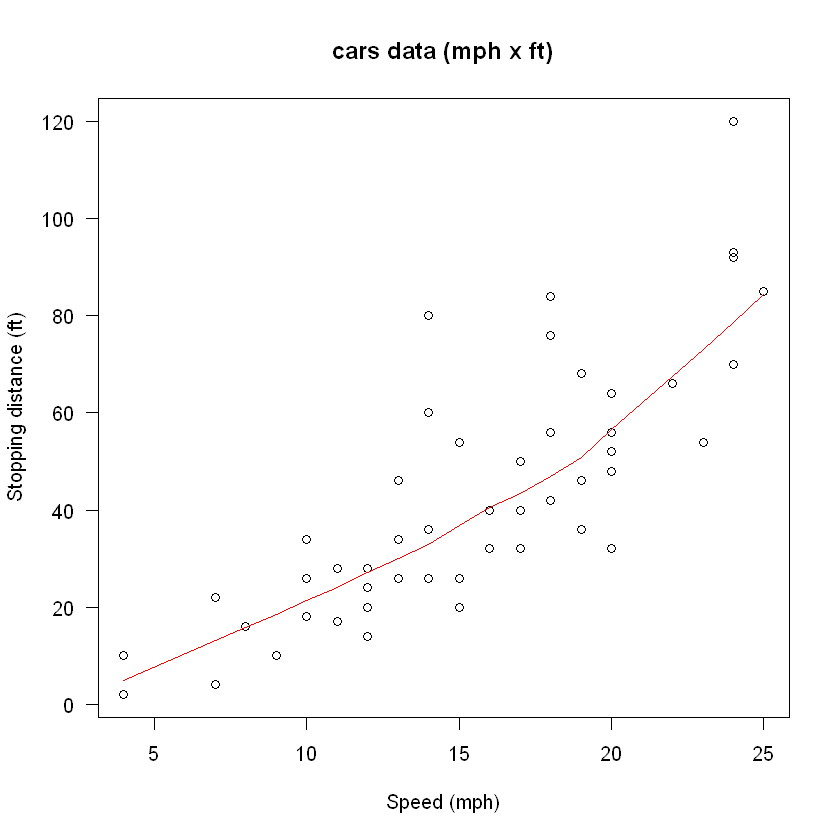

In [14]:
require(stats);
require(graphics)

plot(cars, xlab = "Speed (mph)", ylab = "Stopping distance (ft)", las = 1)
lines(lowess(cars$speed, cars$dist, f = 2/3, iter = 3), col = "red")
title(main = "cars data (mph x ft)")

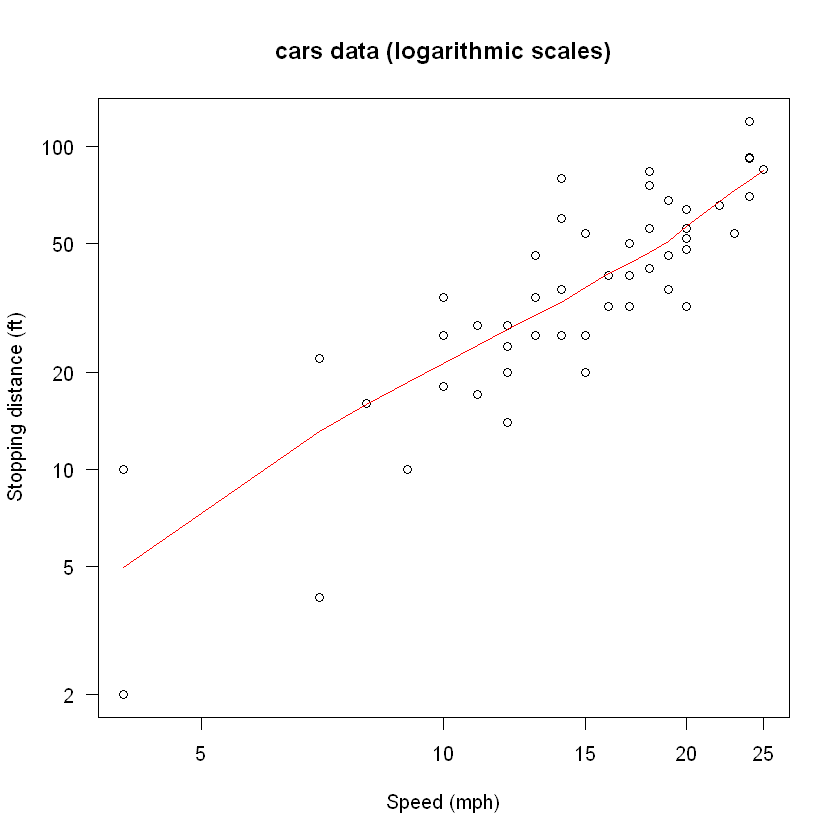

In [16]:
plot(cars, xlab = "Speed (mph)", ylab = "Stopping distance (ft)",
     las = 1, log = "xy")

title(main = "cars data (logarithmic scales)")
lines(lowess(cars$speed, cars$dist, f = 2/3, iter = 3), col = "red")

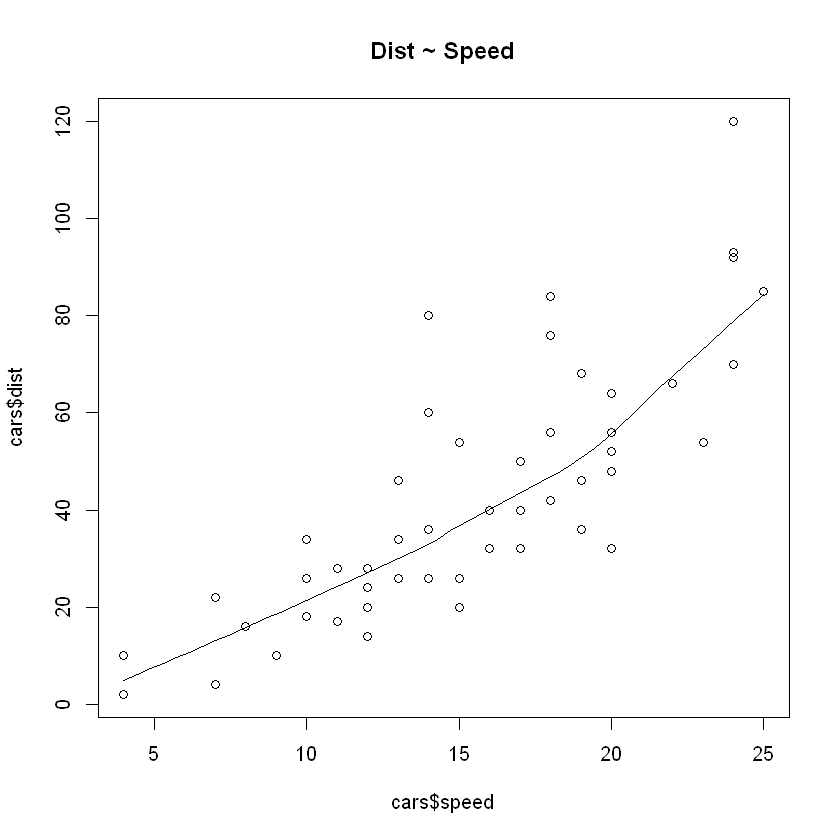

In [22]:
# Verwenden des Streudiagramms zur Visualisierung der Beziehung
scatter.smooth(x=cars$speed, y=cars$dist, main="Dist ~ Speed")  # scatterplot

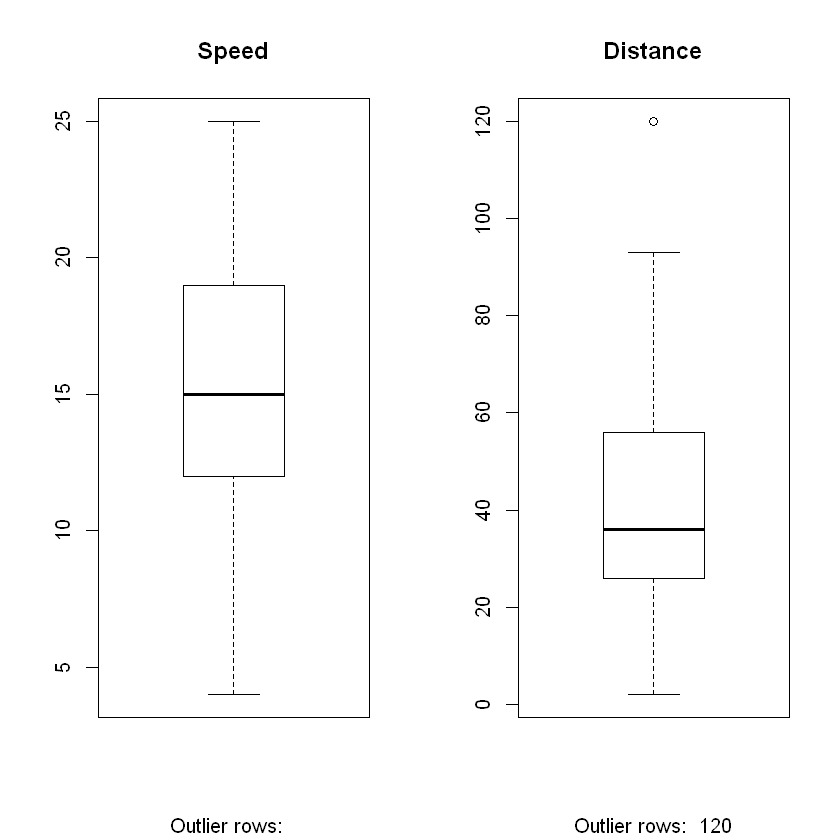

In [23]:
# Verwenden von BoxPlot, um nach Ausreißern zu suchen
par(mfrow=c(1, 2))  # divide graph area in 2 columns
boxplot(cars$speed, main="Speed", sub=paste("Outlier rows: ", boxplot.stats(cars$speed)$out))  # box plot for 'speed'
boxplot(cars$dist, main="Distance", sub=paste("Outlier rows: ", boxplot.stats(cars$dist)$out))  # box plot for 'distance'

In [26]:
# Building the Linear Regression Model
linearMod <- lm(dist ~ speed, data=cars)  # build linear regression model on full data
print(linearMod)


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  



In [27]:
# Linear Regression Diagnostics
summary(linearMod)  # model summary


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


In [ ]:
#  calculate the t Statistic and p-Values

In [28]:
# capture model summary as an object
modelSummary <- summary(linearMod)  

# model coefficients
modelCoeffs <- modelSummary$coefficients  

# get beta estimate for speed
beta.estimate <- modelCoeffs["speed", "Estimate"]

# get std.error for speed  
std.error <- modelCoeffs["speed", "Std. Error"]  

# calc t statistic
t_value <- beta.estimate/std.error  

# calc p Value
p_value <- 2*pt(-abs(t_value), df=nrow(cars)-ncol(cars))  

# fstatistic
f_statistic <- linearMod$fstatistic[1]  

# parameters for model p-value calc
f <- summary(linearMod)$fstatistic
  
model_p <- pf(f[1], f[2], f[3], lower=FALSE)
#> t Value:  9.46399
#> p Value:  1.489836e-12
#> Model F Statistic:  89.56711 1 48
#> Model p-Value:  1.489836e-12

In [31]:
# Step 1: Create the training and test data
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(cars), 0.8*nrow(cars))  # row indices for training data (80%)
trainingData <- cars[trainingRowIndex, ]  # model training data
testData  <- cars[-trainingRowIndex, ]   # test data (rest zum Testen 20%)

In [32]:
#Step 2: Fit the model on training data and predict dist on test data
# Build the model on training data
lmMod <- lm(dist ~ speed, data=trainingData)  # build the model
distPred <- predict(lmMod, testData)  # predict distance

In [37]:
# Step 3. Review Modelsummary
summary (lmMod)  


Call:
lm(formula = dist ~ speed, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.726 -11.242  -2.564  10.436  40.565 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -20.1796     7.8254  -2.579   0.0139 *  
speed         4.2582     0.4947   8.608 1.85e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.49 on 38 degrees of freedom
Multiple R-squared:  0.661,	Adjusted R-squared:  0.6521 
F-statistic: 74.11 on 1 and 38 DF,  p-value: 1.848e-10


In [38]:
# Step 4: Calculate prediction accuracy and error rates:
actuals_preds <- data.frame(cbind(actuals=testData$dist, predicteds=distPred))  # make actuals_predicteds dataframe.
correlation_accuracy <- cor(actuals_preds)  # 82.7%
actuals_preds[1:10,]

,actuals,predicteds
3,4,9.627845
5,16,13.886057
17,34,35.177120
24,20,43.693545
28,40,47.951757
32,42,56.468182
39,32,64.984607
45,54,77.759245
46,70,82.017457
50,85,86.275670



Herzlichen Glückwunsch! Sie sind mit Lektion 61. fertig!